# The Relationship Between EV Adoption, Charging Infrastructure, and Greenhouse Gas Emissions in Washington State


*Replace this text with your summary, including research questions as a numbered list and answers for each research questions.*
1. **How has the annual growth of electric vehicle (EV) registrations evolved in Washington State?**  
   This research aims to analyze the trend of EV adoption over recent years, examining growth rates across different regions and identifying any accelerating or plateauing patterns.

2. **What is the relationship between EV registration rates by ZIP code and the number of public charging stations in those areas?**
   This study will analyze whether areas with more public charging infrastructure experience higher rates of EV adoption and assess whether a lack of charging stations poses a barrier to growth.

4. **How do Washington State’s transportation-related greenhouse gas (GHG) emissions correlate with the growth of EV registrations?**  
   This research analysis will investigate the extent to which increasing EV adoption has contributed to reductions in transportation-related GHG emissions and whether these effects vary across different regions.


## Challenge Goals

### 1. Multiple Datasets:
- **Electric Vehicles Population Data from 1999 to 2025 of Washington State**:  
  [Electric Vehicle Population Data](https://catalog.data.gov/dataset/electric-vehicle-population-data)  
- **Up-to-date Public Electric Vehicle Charging Station Locations in Washington State**:  
  [Public EV Charging Stations](https://afdc.energy.gov/stations#/analyze?country=US&region=US-WA)  
- **Washington State Greenhouse Gas Emission Data from 2012 to 2017**:  
  [WA GHG Reporting Multi-Year Dataset](https://catalog.data.gov/dataset/wa-ghg-reporting-multi-year-dataset)  

Our project will utilize three datasets: EV registration data, charging station data, and GHG emissions data. At least two research questions involve combining datasets:

- **EV registration data and charging station data** will be merged to analyze the relationship between charging infrastructure and EV adoption.  
- **EV registration data and GHG emissions data** will be combined to assess the impact of EV adoption on emissions.

### 2. Advanced Machine Learning
We will employ machine learning to predict EV adoption rates based on charging infrastructure and socioeconomic factors. Specifically, we will compare at least three scikit-learn algorithms (e.g., linear regression, random forest, and Support Vector Machine) to identify the best model for predicting EV adoption.


## Collaboration and Conduct

Students are expected to follow Washington state law on the [Student Conduct Code for the University of Washington](https://www.washington.edu/admin/rules/policies/WAC/478-121TOC.html). In this course, students must:

- Indicate on your submission any assistance received, including materials distributed in this course.
- Not receive, generate, or otherwise acquire any substantial portion or walkthrough to an assessment.
- Not aid, assist, attempt, or tolerate prohibited academic conduct in others.

Update the following code cell to include your name and list your sources. If you used any kind of computer technology to help prepare your assessment submission, include the queries and/or prompts. Submitted work that is not consistent with sources may be subject to the student conduct process.

In [ ]:
your_name = ""
sources = [
    ...
]

assert your_name != "", "your_name cannot be empty"
assert ... not in sources, "sources should not include the placeholder ellipsis"
assert len(sources) >= 6, "must include at least 6 sources, inclusive of lectures and sections"

# Data Setting
### 1. Electric Vehicle Population Data

**Source**: [Electric Vehicle Population Data](https://catalog.data.gov/dataset/electric-vehicle-population-data)  
**Description**: This dataset contains information on EV registrations in Washington State, including vehicle type, location (ZIP code), and model year.

### 2. Alternative Fueling Station Locator Dataset

**Source**: [Alternative Fueling Station Locator](https://afdc.energy.gov/stations#/analyze?country=US&region=US-WA)  
**Description**: This dataset provides the locations of public charging stations, including ZIP code and station type.

### 3. WA GHG Reporting Multi-Year Dataset

**Source**: [WA GHG Reporting Multi-Year Dataset](https://catalog.data.gov/dataset/wa-ghg-reporting-multi-year-dataset)  
**Description**: This dataset contains greenhouse gas emissions data by sector, including transportation, for Washington State.

### Potential Data Challenges:

- **Time Period Misalignment**: The datasets cover different time ranges (EV data: 1999-2025, GHG data: 2012-2017, charging stations: 2024). We will standardize our analysis by selecting overlapping time periods where necessary.
- **Geospatial Differences**: Some datasets report data at the ZIP code level, while others use counties. We may need to aggregate or disaggregate data accordingly.
- **Missing or Incomplete Data**: Some data have missing or incomplete values, necessitating careful handling of missing values.


# Method

### 1. Data Collection and Process

We will import and clean data from our datasets using libraries like Pandas in Python. This involves handling missing values, filtering and dropping unnecessary values, ensuring consistency across datasets, and preparing them for analysis.

### 2. Data Manipulation & Analysis

After cleaning up the datasets, we will create subsets by geographic regions, such as ZIP codes or counties, or chronologically. The data will then be aggregated at different levels to analyze EV registration rates.

### 3. Data Visualization

We will utilize Seaborn and Geospatial DataFrames to create visualizations that highlight both spatial and statistical relationships in our data. Seaborn will be used for correlation and regression plots to illustrate trends in EV adoption over time and across regions. Meanwhile, Geospatial DataFrames will help analyze geographic patterns in EV registrations and public charger distribution. These visualizations will be instrumental in identifying regional disparities, infrastructure gaps, and the relationship between EV adoption and greenhouse gas emissions. Additionally, we will apply machine learning techniques to generate predictive insights and further analysis.

### 4. Analysis

We will use machine learning models from Scikit-learn to analyze the relationship between EV adoption and greenhouse gas (GHG) emissions. By applying regression models and hypothesis tests, we will evaluate the connection between EV adoption and emission reductions. This statistical analysis will help quantify the impact of EV adoption on lowering transportation-related emissions.

### 5. Conclusions & Recommendations

Finally, we will interpret the findings to provide insights for policymakers and stakeholders. The results will be summarized in a structured report, with recommendations on how to improve EV adoption rates and optimize charging infrastructure for maximum environmental benefits.

To ensure our functions work correctly and are not biased, we will create small test datasets with missing values, extra data, and edge cases. Then, we will run our functions on these datasets to check if they handle different situations properly.

In [63]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [58]:
# Electric Vehicle Population Data
ev_population_url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
ev_pop_df = pd.read_csv(ev_population_url)
ev_pop_df["Postal Code"] = pd.to_numeric(ev_pop_df["Postal Code"], errors="coerce").astype("Int64").astype("str")
print("EV population Dataset year-year")
ev_pop_df.head()

EV population Dataset year-year


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,98005,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,0.0,41.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,5YJ3E1EB6K,King,Bothell,WA,98011,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,1.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,5UX43EU02S,Thurston,Olympia,WA,98502,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,0.0,35.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
3,JTMAB3FV5R,Thurston,Olympia,WA,98513,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJYGDEE8M,Yakima,Selah,WA,98942,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,236581355,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


In [78]:
ev_charge_station = pd.read_csv("EV Charging Station location.csv")
print("\n EV Charging Station locations Dataset:")
ev_charge_station.head()


 EV Charging Station locations Dataset:


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class,EV Workplace Charging,Funding Sources
0,ELEC,City of Lacey - City Hall Parking,420 College St,"At 3rd Ave SE, next to police station",Lacey,WA,98503,NaN,360-491-3214,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
1,ELEC,Seattle-Tacoma International Airport - General...,17801 Pacific Hwy S,"5th floor parking garage; rows D, G, and I",Seattle,WA,98188,NaN,206-787-5388,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
2,ELEC,Avista Corp,1411 E Mission Ave,NaN,Spokane,WA,99252,NaN,509-489-0500,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
3,ELEC,Steam Plant Parking,130 S Post St,NaN,Spokane,WA,99201,NaN,800-227-9187,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
4,ELEC,KING COUNTY DES ISSAQUAH P&R 2,1755 Highlands Dr NE,garage,Issaquah,WA,98027,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN


In [51]:
ghg_url = "https://data.wa.gov/api/views/jbe2-ek4r/rows.csv?accessType=DOWNLOAD"
ghg_df = pd.read_csv(ghg_url)

print("WA GHG Reporting Multi-Year Dataset:")
ghg_df.head()

WA GHG Reporting Multi-Year Dataset:


,Source,Sector,Subsector,City,County,Local Air Authority,2012 total emissions (MTCO2e),2012 biogenic carbon dioxide (MTCO2e),2013 total emissions (MTCO2e),2013 biogenic carbon dioxide (MTCO2e),2014 total emissions (MTCO2e),2014 biogenic carbon dioxide (MTCO2e),2015 total emissions (MTCO2e),2015 biogenic carbon dioxide (MTCO2e),2016 total emissions (MTCO2e),2016 biogenic carbon dioxide (MTCO2e),2017 total emissions (MTCO2e),2017 biogenic carbon dioxide (MTCO2e)
0,Agrium Kennewick Fertilizer Operations (KFO) -...,Chemicals,Nitric Acid Production,Kennewick,Benton,Benton Clean Air Agency,146926.0,0.0,154497.0,0.0,132249.0,0.0,155888.0,0.0,151371.0,0.0,144290.0,0.0
1,Air Liquide - Anacortes,Chemicals,Hydrogen Production,Anacortes,Skagit,Northwest Clean Air Agency,63356.0,0.0,58995.0,0.0,64110.0,0.0,64413.0,0.0,60209.0,0.0,63461.0,0.0
2,Alcoa Intalco Works - Ferndale,Metals,Aluminum Production,Ferndale,Whatcom,Ecology: Industrial Section,1146835.0,0.0,1234637.0,0.0,1326684.0,0.0,1195786.0,0.0,1261364.0,0.0,1091665.0,0.0
3,Alcoa Wenatchee Works - Malaga,Metals,Aluminum Production,Malaga,Chelan,Ecology: Industrial Section,306333.0,0.0,318542.0,0.0,354692.0,0.0,331207.0,0.0,898.0,0.0,0.0,0.0
4,Alon Asphalt Company - Seattle,Petroleum and Natural Gas Systems,Other Petroleum and Natural Gas Systems,Seattle,King,Puget Sound Clean Air Agency,15138.0,0.0,14336.0,0.0,16004.0,0.0,13688.0,0.0,14096.0,0.0,14818.0,0.0


## Results

*Replace this text with your results. This section tends to be one of the longer sections of the notebook. Be sure to create new code cells and new Markdown text cells with additional subheadings to explain and break-up longer snippets of code into a more readable format.*

1. *Present and discuss your research results. Treat each of your research questions separately. Include additional discussions for results that are most interesting, surprising, or important.*
2. *Interpret the results. If the answers are unexpected, try to offer an explanation. A good report not only presents the results, but also provides an argument or interpretation based on the data analysis.*
3. *Include any visualizations you have made. In general, these should be generated by your Python code. If you plotted by hand or other software, explain why it was not possible to create the plot you wanted in Python and what you tried.*

*As with assessments, documentation and testing are required. Automated tests must be written in Python using small, manually-verifiable data.*

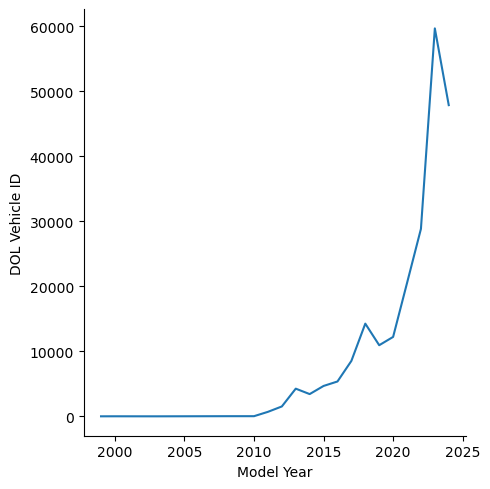

In [102]:
# 1. How has the annual growth of electric vehicle (EV) registrations evolved in Washington State?
ev_pop_df = ev_pop_df[(ev_pop_df["State"] == "WA") & (ev_pop_df["Model Year"] != 2025)]
ev_pop_df.head()
# 记得改scale,去掉2025
ev_pop_sum = ev_pop_df.groupby("Model Year")[["DOL Vehicle ID"]].count()
ev_pop_sum
plot = sns.relplot(ev_pop_sum, x="Model Year", y="DOL Vehicle ID", kind="line")

In [103]:
type(ev_charge_station["ZIP"][0])

str

<Axes: >

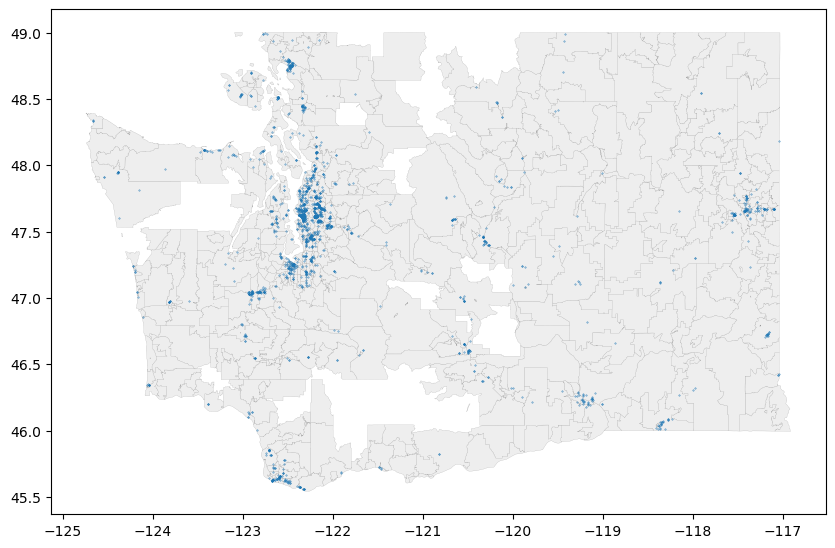

In [106]:
# 2. What is the relationship between EV registration rates by ZIP code and the number of public charging stations in those areas?

ev_pop_2024 = ev_pop_df[ev_pop_df["Model Year"]==2024]
ev_charge_station = ev_charge_station.loc[:, ["Longitude", "Latitude", "ZIP", "City", "Station Name"]]


ev_pop_zipcode_2024 = ev_pop_2024.groupby("Postal Code")["DOL Vehicle ID"].count()


ev_pop_and_charger_2024 = ev_charge_station.merge(ev_pop2024_zipcode, left_on="ZIP", right_on="Postal Code", how="inner")
ev_pop_and_charger_2024.rename(columns={"DOL Vehicle ID": "2024 EV Population"}, inplace=True)
ev_pop_and_charger_2024.set_index("Station Name", inplace=True)

ev_pop_and_charger_2024 = gpd.GeoDataFrame(
    ev_pop_and_charger_2024,
    geometry=gpd.points_from_xy(ev_pop_and_charger_2024["Longitude"], ev_pop_and_charger_2024["Latitude"], crs="EPSG:4326")
)

zipcode_geometry = gpd.read_file('wa_washington_zip_codes_geo.min.json')

fig, ax = plt.subplots(figsize=(10, 8))
zipcode_geometry.plot(ax=ax,color="#EEE", edgecolor="gray", linewidth = 0.1) 
ev_pop_and_charger_2024.plot(ax=ax, markersize=0.1)

<Axes: >

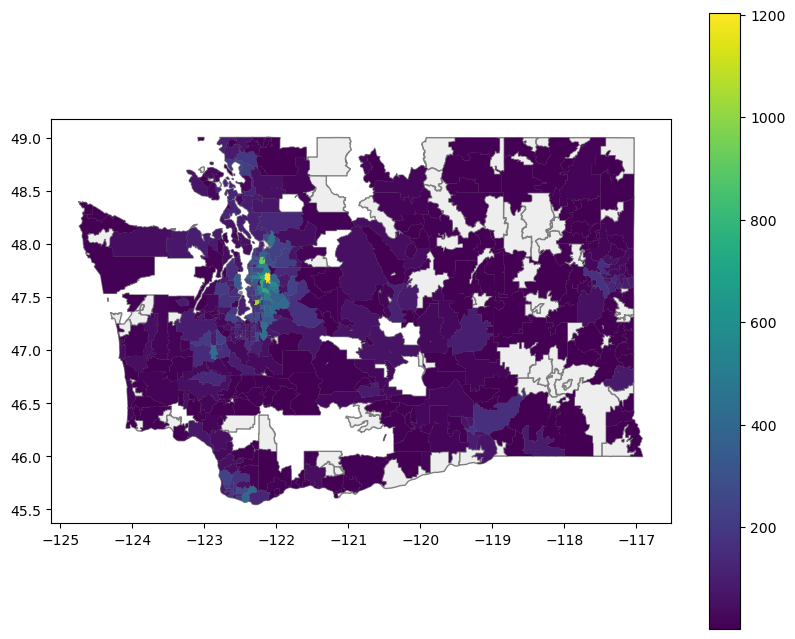

In [121]:
ev_pop_2024 = ev_pop_df[ev_pop_df["Model Year"]==2024]
ev_charge_station = ev_charge_station.loc[:, ["Longitude", "Latitude", "ZIP", "City", "Station Name"]]


ev_pop_zipcode_2024 = ev_pop_2024.groupby("Postal Code")[["DOL Vehicle ID"]].count()
zipcode_geometry = gpd.read_file('wa_washington_zip_codes_geo.min.json')

ev_pop_zipcode = ev_pop_zipcode_2024.merge(zipcode_geometry, left_on="Postal Code", right_on="ZCTA5CE10", how="inner")

ev_pop_zipcode.rename(columns={"DOL Vehicle ID": "2024 EV Population"}, inplace=True)
ev_pop_zipcode = gpd.GeoDataFrame(ev_pop_zipcode, geometry="geometry", crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(10, 8))

zipcode_geometry.plot(ax=ax,color="#EEE", edgecolor="gray")
# ev_pop_and_charger_2024.plot(ax=ax, markersize=0.1)
ev_pop_zipcode.plot(ax=ax, column="2024 EV Population", legend=True)


## Implications and Limitations

*Replace this text with your analysis. Who might benefit from your analysis and who might be excluded or otherwise harmed by it? What about the data setting might have impacted your results? Explain at least 3 limitations of your analysis and how others should or shouldn't be advised to use your conclusions. You may remove the code cell below if you don't need it.*